# HR analytics: Predict who is looking for a new job

#### Independent Variables
enrollee_id : Unique ID for candidate

city: City code

city_ development _index : Developement index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

lastnewjob: Difference in years between previous job and current job

training_hours: training hours completed


#### Target Variable

target: 0 – Not looking for job change, 1 – Looking for a job change

Predict the probability of a candidate will work for the company

Interpret model(s) such a way that illustrate which features affect candidate decision

## Download and read data
#### Importing necessary libraries are used to run this project :

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn import datasets
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
from matplotlib.pyplot import figure

plt.style.use('ggplot')
%matplotlib inline
np.set_printoptions(suppress=True) #
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [76]:
df2 = pd.read_csv('/Users/ghaidaa/Downloads/archive-2/aug_test.csv')


In [77]:
df2.shape

(2129, 13)

In [78]:
df = pd.read_csv('/Users/ghaidaa/Downloads/archive-2/aug_train.csv')

In [79]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


### Divide the data into two training and validation groups :

In [80]:
# create X (features) and y (response)
df.drop('enrollee_id',axis='columns', inplace=True)
X_data = df.drop(columns='target')
y_data= df['target']



In [81]:
X_data.shape

(19158, 12)

In [82]:
y_data.shape

(19158,)

## Exploratory data analysis 

In [83]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 1.8+ MB


In [84]:
X_data.columns

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours'],
      dtype='object')

In [85]:
print("DUPLICATED VALUES:\n")
print(X_data.duplicated().sum())

DUPLICATED VALUES:

74


In [86]:
print("NAN VALUES:\n")
print(X_data.isna().sum())

NAN VALUES:

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
dtype: int64


In [87]:
X_data.describe()

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


In [88]:
X_data.nunique()#  function return number of unique elements in the object.

city                      123
city_development_index     93
gender                      3
relevent_experience         2
enrolled_university         3
education_level             5
major_discipline            6
experience                 22
company_size                8
company_type                6
last_new_job                6
training_hours            241
dtype: int64

In [89]:
print("Value of city development index :\n")
print(X_data["city_development_index"].value_counts())

Value of city development index :

0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.824       4
0.807       4
0.625       3
0.781       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64


In [90]:
print("Value of gender  :\n")
print(X_data['gender'].value_counts())

Value of gender  :

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64


In [91]:
print("Value of relevent experience  :\n")
print(X_data["relevent_experience"].value_counts())

Value of relevent experience  :

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64


In [92]:
print("Value of major discipline:\n")
print(X_data["major_discipline"].value_counts())

Value of major discipline:

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64


In [93]:
print("Value target:\n")
print(y_data.value_counts()) # we have imbalance

Value target:

0.0    14381
1.0     4777
Name: target, dtype: int64


In [94]:
print("Value of training_hours:\n")
print(X_data["training_hours"].value_counts())

Value of training_hours:

28     329
12     292
18     291
22     282
50     279
      ... 
266      6
286      5
272      5
234      5
238      4
Name: training_hours, Length: 241, dtype: int64


In [95]:
print("Value of last new job:\n")
print(X_data["last_new_job"].value_counts())

Value of last new job:

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64


In [96]:
print("Value of company type :\n")
print(X_data["company_type"].value_counts())

Value of company type :

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64


In [97]:
print("Value of company size :\n")
print(X_data["company_size"].value_counts())

Value of company size :

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64


<AxesSubplot:>

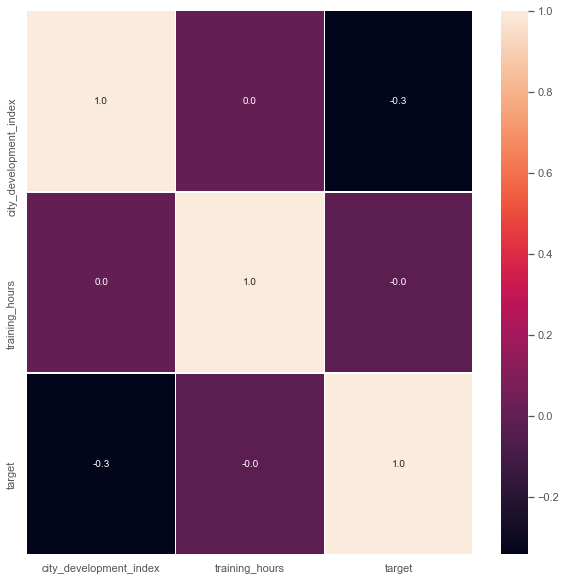

In [98]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth=.5,fmt='.1f')

Text(0.5, 1.0, 'major discipline')

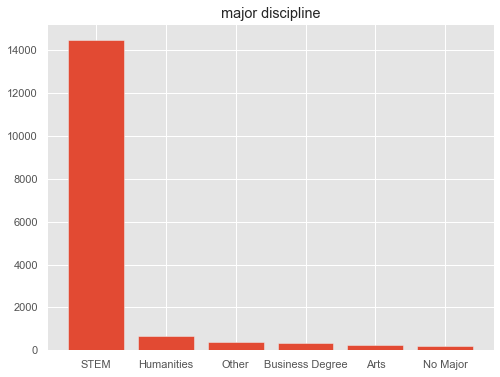

In [99]:
figure(figsize=(8, 6))
mar_stat=X_data['major_discipline'].value_counts()
plt.bar(mar_stat.index,mar_stat)
plt.title('major discipline')

In [100]:
fig = px.pie(X_data['relevent_experience'].value_counts(), values='relevent_experience', 
     names = X_data['relevent_experience'].value_counts().index,title = 'Relevent Experience',template='ggplot2')
fig.show()

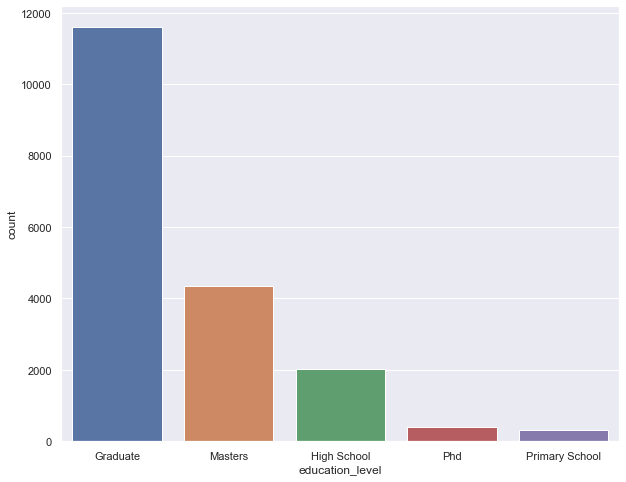

In [101]:
figure(figsize=(10, 8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="education_level", data=X_data)

In [102]:

fig = px.pie(X_data['gender'].value_counts(), values='gender', names = X_data['gender'].value_counts().index,title = 'gender',template='ggplot2')
fig.show()

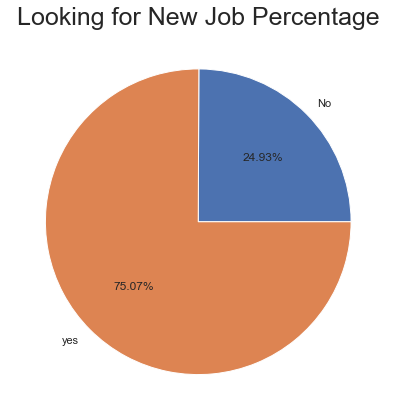

In [103]:
sizes = list(y_data.value_counts().sort_values().values)
#sizes = list(y_data.value_counts().sort_values().index)

labels = ['No', 'yes']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct=lambda p:f'{p:.2f}%')
plt.title('Looking for New Job Percentage', fontsize=25)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Different years of experience')

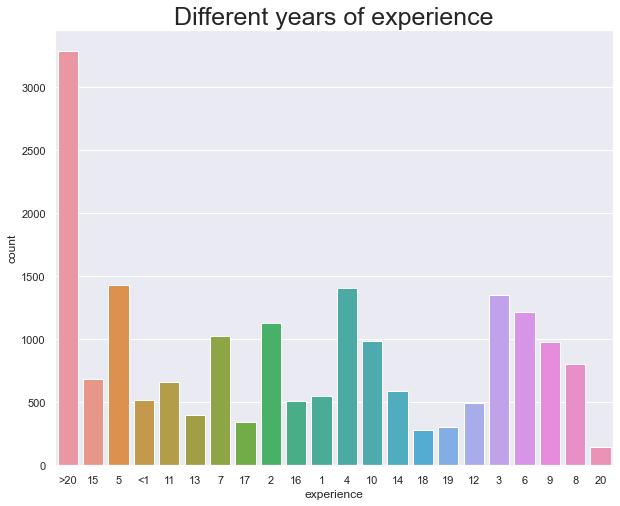

In [104]:
figure(figsize=(10, 8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="experience", data=X_data)
plt.title('Different years of experience', fontsize=25)

### 1) Missing values

In [105]:
missing = pd.DataFrame(X_data.isnull().sum()/len(df), columns=['Missing'])

cm = sns.light_palette("green", as_cmap=True)
missing.style.background_gradient(cmap=cm)

,Missing
city,0.000000
city_development_index,0.000000
gender,0.235306
relevent_experience,0.000000
enrolled_university,0.020148
education_level,0.024011
major_discipline,0.146832
experience,0.003393
company_size,0.309949
company_type,0.320493


In [106]:
missing = pd.DataFrame(y_data.isnull(), columns=['Missing'])
cm = sns.light_palette("green", as_cmap=True)
missing.style.background_gradient(cmap=cm)

,Missing


In [107]:
X_data['last_new_job'].fillna('Not provided',inplace=True)
X_data['company_size'].fillna('Not provided',inplace=True)
X_data['experience'].fillna('Not provided',inplace=True)
X_data['company_type'].fillna('Unknown',inplace=True)
X_data['major_discipline'].fillna('other',inplace=True)

In [108]:
for column in ['gender','enrolled_university','education_level']:
    X_data[column].fillna(X_data[column].mode()[0], inplace=True)

In [109]:
#X_data.drop(X_data.loc[X_data['gender']=='Other'].index, inplace=True)

In [110]:
#y_data['last_new_job'].fillna('Not provided',inplace=True)
#y_data['company_size'].fillna(y_data['company_size'].mean,inplace=True)
#y_data['company_type'].fillna('Unknown',inplace=True)
#y_data['major_discipline'].fillna('other',inplace=True)

In [111]:
#for column in ['gender','enrolled_university','education_level']:
#y_data[column].fillna(data_val[column].mode()[0], inplace=True)

In [112]:
#y_data.drop(y_data.loc[y_data['gender']=='Other'].index, inplace=True)

In [113]:
y_data.isna().sum()

0

In [114]:
X_data.isna().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [115]:
import sys
print(sys.getrecursionlimit())

3000


In [116]:
X_data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Not provided,Unknown,1,36
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,Not provided,Unknown,never,83
3,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,Not provided,Pvt Ltd,never,52
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8


In [117]:

signals=['<','>','-']
column1=['experience','last_new_job','company_size']
for i in signals :
     for j in ['experience','last_new_job']:
        X_data[j]=X_data[j].str.replace(i,'')

In [118]:
X_data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,Not provided,Unknown,1,36
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,4,47
2,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,Not provided,Unknown,never,83
3,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,1,Not provided,Pvt Ltd,never,52
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,50-99,Funded Startup,4,8


### 2) Data Preprocessing & Feature Engineering  :

In [119]:
X_data['city'] = X_data['city'].str.replace('city_','')

In [120]:
X_data['city'].value_counts()

103    4355
21     2702
16     1533
114    1336
160     845
       ... 
111       3
121       3
129       3
140       1
171       1
Name: city, Length: 123, dtype: int64

In [47]:
def company_size_normal(x):
    
    if x == "<10":
        return "LOCAL"
    elif x == "50-99" or x == "10/49":
        return "SMALL"
    elif x == "100-500":
        return "MEDIUM_SCALE"
    elif x == "500-999":
        return "UPPER_SCALE"
    elif x == "1000-4999" or x == "5000-9999":
        return "EXTENDED"
    elif x == "10000+":
        return "LARGE_SCALE"

In [48]:
def last_new_job_normal(x):
    if x == 0:
        return "NEVER"
    elif 0 < x <= 2:
        return "LITTLE_TIME"
    elif x > 2:
        return "WAITING_TOO_MUCH"
    else:
        pass

In [49]:
def experience_normal(x):
    
    if x == 0:
        return 0
    elif 0 < x <= 3:
        return "JUNIOR"
    elif 3 < x <= 7:
        return "MIDDLE_EXPERIENCE"
    elif 7 < x <= 15:
        return "SENIOR"
    elif x > 15:
        return "DOMINATE_BUSINESS"

In [50]:
#X_data["company_size_des"] = X_data["company_size"].apply(lambda x: company_size_normal(x))
#X_data["experience_des"] = X_data["experience"].apply(lambda x: experience_normal(x))
#X_data["last_new_job_des"] = X_data["last_new_job"].apply(lambda x: last_new_job_normal(x))

In [51]:
X_data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,Not provided,Unknown,1,36
1,40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,4,47
2,21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,Not provided,Unknown,never,83
3,115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,1,Not provided,Pvt Ltd,never,52
4,162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,50-99,Funded Startup,4,8


### 3) Preprocessing using LabelEncoder :

In [52]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [53]:
for col in X_data.columns:
    X_data[col] = enc.fit_transform(X_data[col])


In [54]:
from imblearn.over_sampling import SMOTE
import imblearn.over_sampling


n_pos = np.sum(y_data == 1)
n_neg = np.sum(y_data == 0)
ratio = {1 : n_pos *3 , 0 : n_neg}

smote = imblearn.over_sampling.SMOTE(sampling_strategy=ratio, random_state = 42)
    
X_tr_smote, y_tr_smote = smote.fit_resample(X_data, y_data)
#smote=SMOTE(random_state=60)
#X_data, y_data=smote.fit_resample(X_data, y_data)

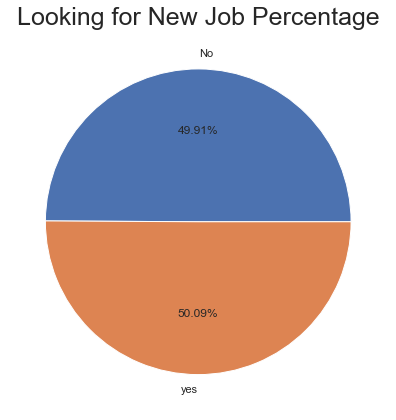

In [55]:
sizes = list(y_data.value_counts().sort_values().values)
#sizes = list(y_data.value_counts().sort_values().index)

labels = ['No', 'yes']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct=lambda p:f'{p:.2f}%')
plt.title('Looking for New Job Percentage', fontsize=25)
plt.tight_layout()
plt.show()

In [56]:
ss = StandardScaler()
ss.fit(X_data)
x_train = ss.transform(X_data)


In [57]:
X_data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,5,85,1,0,2,0,5,12,8,6,0,35
1,77,48,1,1,2,0,5,6,4,5,3,46
2,64,14,1,1,0,0,5,15,8,6,5,82
3,14,52,1,1,2,0,1,0,8,5,5,51
4,50,45,1,0,2,2,5,12,4,1,3,7


In [58]:
y_data.head()

0    1.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: target, dtype: float64

## Baseline model :

In [67]:
X_train, X_val, label_train, label_val = train_test_split(X_tr_smote, y_tr_smote , test_size=0.3, random_state=41)



In [68]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 100))
print(k_range)
param_grid = dict(n_neighbors=k_range)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
grid_Knn = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_Knn.fit(X_train, label_train)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*grid_Knn.score(X_train, label_train)))
print("Valid set: {:6.2f}%".format(100*grid_Knn.score(X_val, label_val)))

The score for kNN is
Training:  99.83%
Test set:  81.27%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
grid_Knn = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_Knn.fit(X_train, label_train)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*grid_Knn.score(X_train, label_train)))
print("Valid set: {:6.2f}%".format(100*grid_Knn.score(X_val, label_val)))

Voting Classifier different model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier 
#Models

logit = LogisticRegression(C = 0.20s)
grid_Knn = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
forest = RandomForestClassifier(max_depth=32, n_estimators= 2250, class_weight = {0:0.7, 1:0.3})
decisiontree = DecisionTreeClassifier(max_depth=4)

#voting classfier train 

voting = VotingClassifier(estimators=[('Lr',logit),('Forest',forest),('tree',decisiontree),('knn',grid_Knn)],voting='hard')
voting = voting.fit(X_train, label_train)

#voting classfier validation 

#voting = VotingClassifier(estimators=[('Lr',logit),('Forest',forest),('tree',decisiontree),('knn',grid_Knn)],voting='hard')
#voting = voting.predict(X_val)

print("Training : {:6.2f}%".format(100*voting.score(X_train, label_train)))
print("validation : {:6.2f}%".format(100*voting.score(X_val, label_val)))


In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cross_val_score(voting,X_tr_smote, y_tr_smote, cv=kf, scoring='r2')

In [ ]:
print(metrics.accuracy_score(label_train, label_val))